In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("weather.csv")
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [3]:
df = df.dropna()

In [4]:
catCol = [i for i in df.columns if df[i].dtype=="O"]
catCol

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in catCol:
    df[i] = le.fit_transform(df[i])

In [6]:
x = df.drop(["RainToday"], axis = 1)
y = df["RainToday"]

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()

In [9]:
knn.fit(x_train, y_train)
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [10]:
knn_pred = knn.predict(x_test)
dtc_pred = dtc.predict(x_test)

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
knn_cm = confusion_matrix(y_test, knn_pred)
dtc_cm = confusion_matrix(y_test, dtc_pred)

In [12]:
print("KNN\n", classification_report(y_test, knn_pred))
print("DT\n", classification_report(y_test, dtc_pred))

KNN
               precision    recall  f1-score   support

           0       0.87      0.89      0.88        54
           1       0.45      0.42      0.43        12

    accuracy                           0.80        66
   macro avg       0.66      0.65      0.66        66
weighted avg       0.80      0.80      0.80        66

DT
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        12

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



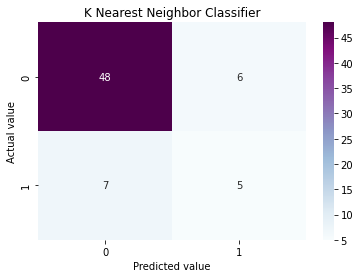

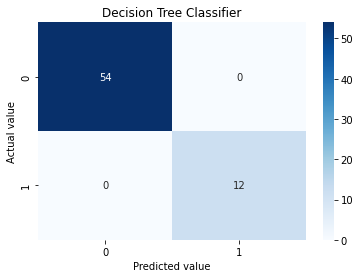

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(knn_cm, annot=True, cmap = 'BuPu')
plt.title("K Nearest Neighbor Classifier")
plt.ylabel("Actual value")
plt.xlabel("Predicted value")
plt.show()

sns.heatmap(dtc_cm, annot = True, cmap='Blues')
plt.title("Decision Tree Classifier")
plt.ylabel("Actual value")
plt.xlabel("Predicted value")
plt.show()